In [1]:
from sklearn import datasets
import tensorflow as tf
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

loading data from sklearn dataset

In [2]:
digits=datasets.load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
print(digits.data.shape)
print(digits.target.shape)
print(digits.images.shape)

(1797, 64)
(1797,)
(1797, 8, 8)


generating the image of the np array of dataset.

8


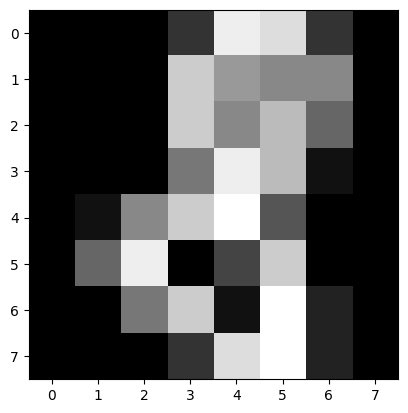

In [4]:
import random
k=random.randint(0,1797)
plt.imshow(digits.images[k],cmap='gray')
print(digits.target[k])

In [5]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

Normalizing the digits.data from values 0-255 to 0-1.

In [6]:
from keras.utils import normalize
import sklearn.preprocessing
normalizer = sklearn.preprocessing.Normalizer().fit(digits.data)
digits.data=normalizer.transform(digits.data)
digits.data

array([[0.        , 0.        , 0.09024036, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.15413829, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.24153867, 0.1358655 ,
        0.        ],
       ...,
       [0.        , 0.        , 0.0140138 , ..., 0.08408278, 0.        ,
        0.        ],
       [0.        , 0.        , 0.03044313, ..., 0.18265877, 0.        ,
        0.        ],
       [0.        , 0.        , 0.14230641, ..., 0.17076769, 0.01423064,
        0.        ]])

Splitting the Training set and test set

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.2)

Fitting the data using XGBoost Classifier

In [8]:
model=XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

Predicting the test data using the model

In [9]:
y_pred=model.predict(x_test)

Checking the score using test set

In [10]:
model.score(x_test,y_test)

0.9583333333333334

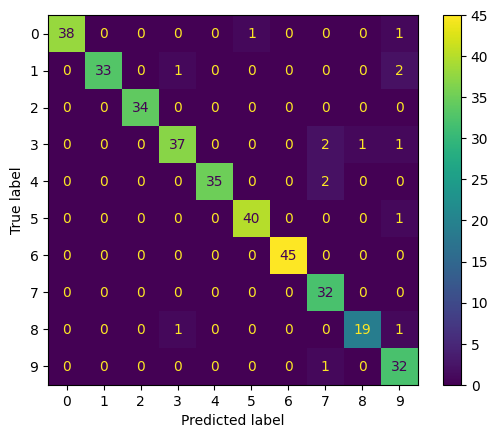

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)


### Using RandomForest for the same dataset

In [12]:
model1=XGBClassifier(n_estimators=50)
model1.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, ...)

In [13]:
y_pred=model1.predict(x_test)

In [14]:
model1.score(x_test,y_test)

0.9583333333333334

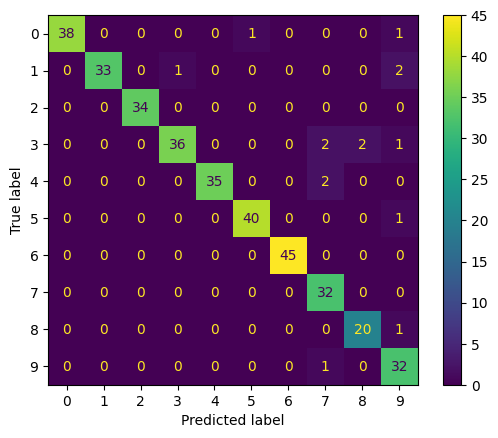

In [15]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)